To get the zillow dataset imported

In [5]:
import requests
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

import json
from config import NasDkey
# url="https://data.nasdaq.com/api/v3/datatables/ZILLOW/REGIONSindicator_id=ZSFH&region_id=99999"


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
zori_df = pd.read_csv(r"source_DB/Zip_ZORI_AllHomesPlusMultifamily_Smoothed.csv", index_col="RegionName")
zori_df.head()


,RegionID,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10025,61639,1,"New York, NY",3085.0,3005.0,3096.0,3120.0,3111.0,3115.0,3167.0,3193.0,3173.0,3208.0,3201.0,3245.0,3264.0,3254.0,3252.0,3250.0,3271.0,3296.0,3308.0,3309.0,3318.0,3323.0,3305.0,3305.0,3330.0,3311.0,3336.0,3336.0,3341.0,3362.0,3300.0,3343.0,3377.0,3336.0,3312.0,3292.0,3299.0,3281.0,3243.0,3292.0,3362.0,3366.0,3375.0,3383.0,3354.0,3313.0,3301.0,3337.0,3286.0,3283.0,3267.0,3324.0,3361.0,3371.0,3388.0,3385.0,3369.0,3369.0,3364.0,3383.0,3394.0,3377.0,3382.0,3394.0,3420.0,3458.0,3482.0,3508.0,3499.0,3439.0,3462.0,3440.0,3456.0,3481.0,3433.0,3440.0,3392.0,3322.0,3265.0,3154.0,3031.0,2986.0,2934.0,2911.0,2931.0,2920.0,2979.0,3057.0,3140.0,3219.0,3305.0,3396.0,3418.0,3479.0,3517.0,3561.0,3591.0,3688.0,3744.0,3778.0,3843.0,3911.0
60657,84654,2,"Chicago, IL",1535.0,1572.0,1571.0,1580.0,1596.0,1633.0,1636.0,1637.0,1621.0,1609.0,1607.0,1609.0,1608.0,1620.0,1613.0,1643.0,1671.0,1693.0,1701.0,1710.0,1680.0,1663.0,1657.0,1664.0,1657.0,1673.0,1697.0,1716.0,1734.0,1749.0,1757.0,1760.0,1745.0,1718.0,1700.0,1697.0,1714.0,1737.0,1758.0,1765.0,1774.0,1785.0,1792.0,1781.0,1765.0,1746.0,1735.0,1728.0,1741.0,1757.0,1773.0,1789.0,1803.0,1810.0,1810.0,1787.0,1779.0,1744.0,1727.0,1721.0,1754.0,1770.0,1792.0,1815.0,1829.0,1839.0,1850.0,1831.0,1829.0,1807.0,1794.0,1779.0,1819.0,1835.0,1848.0,1853.0,1847.0,1841.0,1828.0,1817.0,1779.0,1741.0,1727.0,1736.0,1755.0,1772.0,1782.0,1793.0,1815.0,1824.0,1826.0,1843.0,1840.0,1834.0,1851.0,1858.0,1898.0,1902.0,1937.0,1959.0,1985.0,2001.0
10023,61637,3,"New York, NY",3206.0,3224.0,3266.0,3256.0,3275.0,3335.0,3325.0,3333.0,3333.0,3311.0,3386.0,3333.0,3315.0,3338.0,3371.0,3340.0,3357.0,3385.0,3385.0,3414.0,3422.0,3425.0,3424.0,3397.0,3370.0,3405.0,3424.0,3429.0,3440.0,3436.0,3272.0,3341.0,3374.0,3406.0,3347.0,3343.0,3324.0,3375.0,3379.0,3437.0,3435.0,3453.0,3453.0,3433.0,3406.0,3399.0,3377.0,3339.0,3361.0,3374.0,3397.0,3426.0,3453.0,3451.0,3424.0,3446.0,3460.0,3445.0,3414.0,3386.0,3381.0,3394.0,3414.0,3456.0,3484.0,3520.0,3531.0,3531.0,3534.0,3463.0,3417.0,3442.0,3484.0,3507.0,3520.0,3497.0,3443.0,3398.0,3327.0,3187.0,3143.0,3057.0,2967.0,2928.0,2945.0,2986.0,3021.0,3092.0,3148.0,3256.0,3367.0,3450.0,3583.0,3679.0,3673.0,3752.0,3799.0,3832.0,3885.0,3898.0,3981.0,4021.0
77494,91982,4,"Houston, TX",1487.0,1553.0,1561.0,1569.0,1542.0,1529.0,1534.0,1527.0,1524.0,1501.0,1500.0,1494.0,1500.0,1492.0,1497.0,1506.0,1509.0,1517.0,1523.0,1535.0,1516.0,1502.0,1498.0,1481.0,1475.0,1468.0,1470.0,1468.0,1466.0,1473.0,1465.0,1464.0,1452.0,1441.0,1412.0,1410.0,1417.0,1430.0,1436.0,1451.0,1455.0,1459.0,1449.0,1438.0,1451.0,1461.0,1469.0,1476.0,1486.0,1487.0,1483.0,1485.0,1485.0,1490.0,1487.0,1480.0,1463.0,1471.0,1473.0,1478.0,1480.0,1482.0,1489.0,1493.0,1494.0,1502.0,1506.0,1520.0,1498.0,1506.0,1504.0,1509.0,1501.0,1507.0,1508.0,1517.0,1504.0,1505.0,1513.0,1516.0,1531.0,1523.0,1541.0,1541.0,1538.0,1536.0,1541.0,1572.0,1605.0,1661.0,1709.0,1733.0,1735.0,1763.0,1789.0,1783.0,1774.0,1790.0,1789.0,1815.0,1830.0,1840.0
60614,84616,5,"Chicago, IL",1633.0,1659.0,1670.0,1682.0,1702.0,1719.0,1

In [8]:
zori_df=zori_df.reset_index(level=None, drop=False, inplace=False)
zori_df

,RegionName,RegionID,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
0,10025,61639,1,"New York, NY",3085.0,3005.0,3096.0,3120.0,3111.0,3115.0,3167.0,3193.0,3173.0,3208.0,3201.0,3245.0,3264.0,3254.0,3252.0,3250.0,3271.0,3296.0,3308.0,3309.0,3318.0,3323.0,3305.0,3305.0,3330.0,3311.0,3336.0,3336.0,3341.0,3362.0,3300.0,3343.0,3377.0,3336.0,3312.0,3292.0,3299.0,3281.0,3243.0,3292.0,3362.0,3366.0,3375.0,3383.0,3354.0,3313.0,3301.0,3337.0,3286.0,3283.0,3267.0,3324.0,3361.0,3371.0,3388.0,3385.0,3369.0,3369.0,3364.0,3383.0,3394.0,3377.0,3382.0,3394.0,3420.0,3458.0,3482.0,3508.0,3499.0,3439.0,3462.0,3440.0,3456.0,3481.0,3433.0,3440.0,3392.0,3322.0,3265.0,3154.0,3031.0,2986.0,2934.0,2911.0,2931.0,2920.0,2979.0,3057.0,3140.0,3219.0,3305.0,3396.0,3418.0,3479.0,3517.0,3561.0,3591.0,3688.0,3744.0,3778.0,3843.0,3911.0
1,60657,84654,2,"Chicago, IL",1535.0,1572.0,1571.0,1580.0,1596.0,1633.0,1636.0,1637.0,1621.0,1609.0,1607.0,1609.0,1608.0,1620.0,1613.0,1643.0,1671.0,1693.0,1701.0,1710.0,1680.0,1663.0,1657.0,1664.0,1657.0,1673.0,1697.0,1716.0,1734.0,1749.0,1757.0,1760.0,1745.0,1718.0,1700.0,1697.0,1714.0,1737.0,1758.0,1765.0,1774.0,1785.0,1792.0,1781.0,1765.0,1746.0,1735.0,1728.0,1741.0,1757.0,1773.0,1789.0,1803.0,1810.0,1810.0,1787.0,1779.0,1744.0,1727.0,1721.0,1754.0,1770.0,1792.0,1815.0,1829.0,1839.0,1850.0,1831.0,1829.0,1807.0,1794.0,1779.0,1819.0,1835.0,1848.0,1853.0,1847.0,1841.0,1828.0,1817.0,1779.0,1741.0,1727.0,1736.0,1755.0,1772.0,1782.0,1793.0,1815.0,1824.0,1826.0,1843.0,1840.0,1834.0,1851.0,1858.0,1898.0,1902.0,1937.0,1959.0,1985.0,2001.0
2,10023,61637,3,"New York, NY",3206.0,3224.0,3266.0,3256.0,3275.0,3335.0,3325.0,3333.0,3333.0,3311.0,3386.0,3333.0,3315.0,3338.0,3371.0,3340.0,3357.0,3385.0,3385.0,3414.0,3422.0,3425.0,3424.0,3397.0,3370.0,3405.0,3424.0,3429.0,3440.0,3436.0,3272.0,3341.0,3374.0,3406.0,3347.0,3343.0,3324.0,3375.0,3379.0,3437.0,3435.0,3453.0,3453.0,3433.0,3406.0,3399.0,3377.0,3339.0,3361.0,3374.0,3397.0,3426.0,3453.0,3451.0,3424.0,3446.0,3460.0,3445.0,3414.0,3386.0,3381.0,3394.0,3414.0,3456.0,3484.0,3520.0,3531.0,3531.0,3534.0,3463.0,3417.0,3442.0,3484.0,3507.0,3520.0,3497.0,3443.0,3398.0,3327.0,3187.0,3143.0,3057.0,2967.0,2928.0,2945.0,2986.0,3021.0,3092.0,3148.0,3256.0,3367.0,3450.0,3583.0,3679.0,3673.0,3752.0,3799.0,3832.0,3885.0,3898.0,3981.0,4021.0
3,77494,91982,4,"Houston, TX",1487.0,1553.0,1561.0,1569.0,1542.0,1529.0,1534.0,1527.0,1524.0,1501.0,1500.0,1494.0,1500.0,1492.0,1497.0,1506.0,1509.0,1517.0,1523.0,1535.0,1516.0,1502.0,1498.0,1481.0,1475.0,1468.0,1470.0,1468.0,1466.0,1473.0,1465.0,1464.0,1452.0,1441.0,1412.0,1410.0,1417.0,1430.0,1436.0,1451.0,1455.0,1459.0,1449.0,1438.0,1451.0,1461.0,1469.0,1476.0,1486.0,1487.0,1483.0,1485.0,1485.0,1490.0,1487.0,1480.0,1463.0,1471.0,1473.0,1478.0,1480.0,1482.0,1489.0,1493.0,1494.0,1502.0,1506.0,1520.0,1498.0,1506.0,1504.0,1509.0,1501.0,1507.0,1508.0,1517.0,1504.0,1505.0,1513.0,1516.0,1531.0,1523.0,1541.0,1541.0,1538.0,1536.0,1541.0,1572.0,1605.0,1661.0,1709.0,1733.0,1735.0,1763.0,1789.0,1783.0,1774.0,1790.0,1789.0,1815.0,1830.0,1840.0
4,60614,84616,5,"Chicago, IL",1633.0,1659.0,1670.0,1682.0,1702.0,1719.0,1739.0,1736.0,1717.0,1706.0,1711.0,1684.0,1684.0,1697.0,1683.0,1732.0,1763.0,1790.0,1803.0,1812.

In [9]:
chiframe=(zori_df.loc[zori_df["RegionName"].isin([60618,60647,60625,60608,60624,60614])])

chiframe.head()

,RegionName,RegionID,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
4,60614,84616,5,"Chicago, IL",1633.0,1659.0,1670.0,1682.0,1702.0,1719.0,1739.0,1736.0,1717.0,1706.0,1711.0,1684.0,1684.0,1697.0,1683.0,1732.0,1763.0,1790.0,1803.0,1812.0,1797.0,1796.0,1764.0,1741.0,1773.0,1796.0,1805.0,1820.0,1854.0,1875.0,1875.0,1873.0,1864.0,1819.0,1800.0,1794.0,1793.0,1830.0,1848.0,1877.0,1891.0,1895.0,1894.0,1897.0,1886.0,1851.0,1837.0,1836.0,1846.0,1876.0,1903.0,1902.0,1921.0,1930.0,1927.0,1917.0,1895.0,1858.0,1847.0,1857.0,1889.0,1914.0,1920.0,1946.0,1971.0,1972.0,1972.0,1964.0,1962.0,1948.0,1926.0,1942.0,1935.0,1958.0,1982.0,2010.0,2006.0,1989.0,1979.0,1955.0,1909.0,1858.0,1785.0,1758.0,1793.0,1850.0,1897.0,1963.0,1993.0,2009.0,2007.0,2041.0,2014.0,2026.0,2039.0,2025.0,2054.0,2075.0,2144.0,2193.0,2207.0,2230.0
15,60647,84646,19,"Chicago, IL",1424.0,1387.0,1415.0,1420.0,1439.0,1449.0,1458.0,1482.0,1473.0,1453.0,1434.0,1476.0,1458.0,1476.0,1440.0,1461.0,1510.0,1528.0,1548.0,1568.0,1545.0,1535.0,1525.0,1521.0,1549.0,1568.0,1577.0,1595.0,1610.0,1621.0,1630.0,1618.0,1596.0,1574.0,1556.0,1554.0,1569.0,1588.0,1609.0,1627.0,1646.0,1658.0,1657.0,1648.0,1638.0,1636.0,1628.0,1592.0,1599.0,1626.0,1652.0,1672.0,1686.0,1703.0,1707.0,1715.0,1684.0,1658.0,1650.0,1653.0,1685.0,1691.0,1712.0,1732.0,1741.0,1747.0,1754.0,1747.0,1757.0,1744.0,1732.0,1722.0,1725.0,1751.0,1766.0,1753.0,1761.0,1752.0,1746.0,1715.0,1697.0,1660.0,1638.0,1650.0,1673.0,1688.0,1709.0,1717.0,1740.0,1749.0,1745.0,1760.0,1746.0,1752.0,1792.0,1801.0,1805.0,1837.0,1861.0,1887.0,1905.0,1902.0
24,60618,84620,29,"Chicago, IL",1316.0,1267.0,1308.0,1320.0,1327.0,1340.0,1356.0,1372.0,1365.0,1361.0,1348.0,1344.0,1349.0,1375.0,1335.0,1342.0,1372.0,1396.0,1419.0,1425.0,1424.0,1414.0,1406.0,1400.0,1415.0,1429.0,1431.0,1441.0,1449.0,1464.0,1465.0,1466.0,1468.0,1452.0,1449.0,1445.0,1462.0,1457.0,1469.0,1477.0,1491.0,1501.0,1497.0,1492.0,1482.0,1469.0,1462.0,1468.0,1481.0,1484.0,1504.0,1525.0,1531.0,1530.0,1534.0,1537.0,1515.0,1512.0,1500.0,1486.0,1507.0,1531.0,1537.0,1557.0,1562.0,1577.0,1578.0,1565.0,1556.0,1552.0,1556.0,1554.0,1558.0,1579.0,1591.0,1575.0,1584.0,1581.0,1575.0,1567.0,1541.0,1533.0,1512.0,1520.0,1536.0,1554.0,1570.0,1580.0,1582.0,1595.0,1600.0,1590.0,1589.0,1605.0,1605.0,1618.0,1650.0,1654.0,1670.0,1681.0,1702.0,1702.0
49,60625,84627,58,"Chicago, IL",1193.0,1189.0,1178.0,1177.0,1198.0,1208.0,1217.0,1214.0,1219.0,1203.0,1208.0,1222.0,1221.0,1217.0,1208.0,1239.0,1246.0,1272.0,1275.0,1287.0,1284.0,1271.0,1257.0,1264.0,1266.0,1279.0,1277.0,1286.0,1301.0,1293.0,1300.0,1307.0,1302.0,1275.0,1269.0,1262.0,1269.0,1293.0,1304.0,1316.0,1332.0,1337.0,1332.0,1330.0,1323.0,1311.0,1308.0,1300.0,1321.0,1320.0,1328.0,1336.0,1355.0,1356.0,1346.0,1359.0,1347.0,1337.0,1339.0,1325.0,1348.0,1353.0,1374.0,1376.0,1380.0,1381.0,1381.0,1381.0,1374.0,1362.0,1342.0,1351.0,1379.0,1387.0,1402.0,1396.0,1386.0,1392.0,1389.0,1377.0,1359.0,1341.0,1338.0,1351.0,1359.0,1367.0,1357.0,1376.0,1379.0,1389.0,1393.0,1402.0,1398.0,1387.0,1418.0,1412.0,1410.0,1428.0,1477.0,1482.0,1484.0,1494.0
351,60608,84610,505,"Chicago, IL",1141.0,1189.0,1195.0,1188.0,1194.0,1210.0,1198.0,1185.0,1197.0,1193.0,1188.0,1248.0,1248.0,1263.0,1232.0,1248.0,1258.0,1266.0,1259

In [10]:
list(zori_df.columns)


['RegionName',
 'RegionID',
 'SizeRank',
 'MsaName',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',

In [11]:
chiframe=chiframe[['RegionName','2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12',
 '2022-01',
 '2022-02',
 '2022-03',
 '2022-04',
 '2022-05',
 '2022-06']
]
chiframe

,RegionName,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
4,60614,1773.0,1796.0,1805.0,1820.0,1854.0,1875.0,1875.0,1873.0,1864.0,1819.0,1800.0,1794.0,1793.0,1830.0,1848.0,1877.0,1891.0,1895.0,1894.0,1897.0,1886.0,1851.0,1837.0,1836.0,1846.0,1876.0,1903.0,1902.0,1921.0,1930.0,1927.0,1917.0,1895.0,1858.0,1847.0,1857.0,1889.0,1914.0,1920.0,1946.0,1971.0,1972.0,1972.0,1964.0,1962.0,1948.0,1926.0,1942.0,1935.0,1958.0,1982.0,2010.0,2006.0,1989.0,1979.0,1955.0,1909.0,1858.0,1785.0,1758.0,1793.0,1850.0,1897.0,1963.0,1993.0,2009.0,2007.0,2041.0,2014.0,2026.0,2039.0,2025.0,2054.0,2075.0,2144.0,2193.0,2207.0,2230.0
15,60647,1549.0,1568.0,1577.0,1595.0,1610.0,1621.0,1630.0,1618.0,1596.0,1574.0,1556.0,1554.0,1569.0,1588.0,1609.0,1627.0,1646.0,1658.0,1657.0,1648.0,1638.0,1636.0,1628.0,1592.0,1599.0,1626.0,1652.0,1672.0,1686.0,1703.0,1707.0,1715.0,1684.0,1658.0,1650.0,1653.0,1685.0,1691.0,1712.0,1732.0,1741.0,1747.0,1754.0,1747.0,1757.0,1744.0,1732.0,1722.0,1725.0,1751.0,1766.0,1753.0,1761.0,1752.0,1746.0,1715.0,1697.0,1660.0,1638.0,1650.0,1673.0,1688.0,1709.0,1717.0,1740.0,1749.0,1745.0,1760.0,1746.0,1752.0,1792.0,1801.0,1805.0,1837.0,1861.0,1887.0,1905.0,1902.0
24,60618,1415.0,1429.0,1431.0,1441.0,1449.0,1464.0,1465.0,1466.0,1468.0,1452.0,1449.0,1445.0,1462.0,1457.0,1469.0,1477.0,1491.0,1501.0,1497.0,1492.0,1482.0,1469.0,1462.0,1468.0,1481.0,1484.0,1504.0,1525.0,1531.0,1530.0,1534.0,1537.0,1515.0,1512.0,1500.0,1486.0,1507.0,1531.0,1537.0,1557.0,1562.0,1577.0,1578.0,1565.0,1556.0,1552.0,1556.0,1554.0,1558.0,1579.0,1591.0,1575.0,1584.0,1581.0,1575.0,1567.0,1541.0,1533.0,1512.0,1520.0,1536.0,1554.0,1570.0,1580.0,1582.0,1595.0,1600.0,1590.0,1589.0,1605.0,1605.0,1618.0,1650.0,1654.0,1670.0,1681.0,1702.0,1702.0
49,60625,1266.0,1279.0,1277.0,1286.0,1301.0,1293.0,1300.0,1307.0,1302.0,1275.0,1269.0,1262.0,1269.0,1293.0,1304.0,1316.0,1332.0,1337.0,1332.0,1330.0,1323.0,1311.0,1308.0,1300.0,1321.0,1320.0,1328.0,1336.0,1355.0,1356.0,1346.0,1359.0,1347.0,1337.0,1339.0,1325.0,1348.0,1353.0,1374.0,1376.0,1380.0,1381.0,1381.0,1381.0,1374.0,1362.0,1342.0,1351.0,1379.0,1387.0,1402.0,1396.0,1386.0,1392.0,1389.0,1377.0,1359.0,1341.0,1338.0,1351.0,1359.0,1367.0,1357.0,1376.0,1379.0,1389.0,1393.0,1402.0,1398.0,1387.0,1418.0,1412.0,1410.0,1428.0,1477.0,1482.0,1484.0,1494.0
351,60608,1277.0,1267.0,1297.0,1319.0,1316.0,1310.0,1306.0,1318.0,1304.0,1295.0,1348.0,1311.0,1304.0,1304.0,1315.0,1326.0,1339.0,1349.0,1356.0,1349.0,1362.0,1344.0,1309.0,1285.0,1314.0,1328.0,1364.0,1376.0,1389.0,1384.0,1399.0,1412.0,1408.0,1406.0,1396.0,1398.0,1410.0,1412.0,1419.0,1431.0,1438.0,1460.0,1455.0,1452.0,1443.0,1442.0,1436.0,1391.0,1432.0,1449.0,1443.0,1435.0,1441.0,1461.0,1466.0,1449.0,1441.0,1404.0,1399.0,1378.0,1405.0,1423.0,1438.0,1436.0,1446.0,1475.0,1470.0,1470.0,1445.0,1470.0,1506.0,1446.0,1477.0,1509.0,1540.0,1552.0,1559.0,1578.0
1620,60624,1102.0,1172.0,1188.0,NaN,1184.0,1178.0,1204.0,1203.0,1255.0,1223.0,1206.0,1228.0,1139.0,1188.0,1214.0,1193.0,1221.0,1238.0,1237.0,1230.0,1238.0,1227.0,1220.0,1256.0,1242.0,1269.0,1257.0,1250.0,1259.0,1253.0,1247.0,1227.0,1254.0,1274.0,1245.0,1241.0,1263.0,1229.0,1246.0,1236.0,1279.0,1286.0,1284.0,1276.0,1262.0,1261.0,1267.0,1297.0,1262.0,1271.0,1289.0,1356.0,1325.0,1267.0,1286.0,1273.0,1292.0,1290.0,1257.0,1275.0,1267.0,1269.0,1300.0,1293.0,1278.0,1287.0,1305.0,1350.0,1330.0,1334.0,1332.0,1348.0,1359.0,1338.0,1363.0,1371.0,1370.0,1362.0


In [12]:
chiframe =chiframe.rename(columns={"RegionName":"Zip_Code"})
# chiframe.reset_index(level=None, drop=False, inplace=False)
chiframe


,Zip_Code,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
4,60614,1773.0,1796.0,1805.0,1820.0,1854.0,1875.0,1875.0,1873.0,1864.0,1819.0,1800.0,1794.0,1793.0,1830.0,1848.0,1877.0,1891.0,1895.0,1894.0,1897.0,1886.0,1851.0,1837.0,1836.0,1846.0,1876.0,1903.0,1902.0,1921.0,1930.0,1927.0,1917.0,1895.0,1858.0,1847.0,1857.0,1889.0,1914.0,1920.0,1946.0,1971.0,1972.0,1972.0,1964.0,1962.0,1948.0,1926.0,1942.0,1935.0,1958.0,1982.0,2010.0,2006.0,1989.0,1979.0,1955.0,1909.0,1858.0,1785.0,1758.0,1793.0,1850.0,1897.0,1963.0,1993.0,2009.0,2007.0,2041.0,2014.0,2026.0,2039.0,2025.0,2054.0,2075.0,2144.0,2193.0,2207.0,2230.0
15,60647,1549.0,1568.0,1577.0,1595.0,1610.0,1621.0,1630.0,1618.0,1596.0,1574.0,1556.0,1554.0,1569.0,1588.0,1609.0,1627.0,1646.0,1658.0,1657.0,1648.0,1638.0,1636.0,1628.0,1592.0,1599.0,1626.0,1652.0,1672.0,1686.0,1703.0,1707.0,1715.0,1684.0,1658.0,1650.0,1653.0,1685.0,1691.0,1712.0,1732.0,1741.0,1747.0,1754.0,1747.0,1757.0,1744.0,1732.0,1722.0,1725.0,1751.0,1766.0,1753.0,1761.0,1752.0,1746.0,1715.0,1697.0,1660.0,1638.0,1650.0,1673.0,1688.0,1709.0,1717.0,1740.0,1749.0,1745.0,1760.0,1746.0,1752.0,1792.0,1801.0,1805.0,1837.0,1861.0,1887.0,1905.0,1902.0
24,60618,1415.0,1429.0,1431.0,1441.0,1449.0,1464.0,1465.0,1466.0,1468.0,1452.0,1449.0,1445.0,1462.0,1457.0,1469.0,1477.0,1491.0,1501.0,1497.0,1492.0,1482.0,1469.0,1462.0,1468.0,1481.0,1484.0,1504.0,1525.0,1531.0,1530.0,1534.0,1537.0,1515.0,1512.0,1500.0,1486.0,1507.0,1531.0,1537.0,1557.0,1562.0,1577.0,1578.0,1565.0,1556.0,1552.0,1556.0,1554.0,1558.0,1579.0,1591.0,1575.0,1584.0,1581.0,1575.0,1567.0,1541.0,1533.0,1512.0,1520.0,1536.0,1554.0,1570.0,1580.0,1582.0,1595.0,1600.0,1590.0,1589.0,1605.0,1605.0,1618.0,1650.0,1654.0,1670.0,1681.0,1702.0,1702.0
49,60625,1266.0,1279.0,1277.0,1286.0,1301.0,1293.0,1300.0,1307.0,1302.0,1275.0,1269.0,1262.0,1269.0,1293.0,1304.0,1316.0,1332.0,1337.0,1332.0,1330.0,1323.0,1311.0,1308.0,1300.0,1321.0,1320.0,1328.0,1336.0,1355.0,1356.0,1346.0,1359.0,1347.0,1337.0,1339.0,1325.0,1348.0,1353.0,1374.0,1376.0,1380.0,1381.0,1381.0,1381.0,1374.0,1362.0,1342.0,1351.0,1379.0,1387.0,1402.0,1396.0,1386.0,1392.0,1389.0,1377.0,1359.0,1341.0,1338.0,1351.0,1359.0,1367.0,1357.0,1376.0,1379.0,1389.0,1393.0,1402.0,1398.0,1387.0,1418.0,1412.0,1410.0,1428.0,1477.0,1482.0,1484.0,1494.0
351,60608,1277.0,1267.0,1297.0,1319.0,1316.0,1310.0,1306.0,1318.0,1304.0,1295.0,1348.0,1311.0,1304.0,1304.0,1315.0,1326.0,1339.0,1349.0,1356.0,1349.0,1362.0,1344.0,1309.0,1285.0,1314.0,1328.0,1364.0,1376.0,1389.0,1384.0,1399.0,1412.0,1408.0,1406.0,1396.0,1398.0,1410.0,1412.0,1419.0,1431.0,1438.0,1460.0,1455.0,1452.0,1443.0,1442.0,1436.0,1391.0,1432.0,1449.0,1443.0,1435.0,1441.0,1461.0,1466.0,1449.0,1441.0,1404.0,1399.0,1378.0,1405.0,1423.0,1438.0,1436.0,1446.0,1475.0,1470.0,1470.0,1445.0,1470.0,1506.0,1446.0,1477.0,1509.0,1540.0,1552.0,1559.0,1578.0
1620,60624,1102.0,1172.0,1188.0,NaN,1184.0,1178.0,1204.0,1203.0,1255.0,1223.0,1206.0,1228.0,1139.0,1188.0,1214.0,1193.0,1221.0,1238.0,1237.0,1230.0,1238.0,1227.0,1220.0,1256.0,1242.0,1269.0,1257.0,1250.0,1259.0,1253.0,1247.0,1227.0,1254.0,1274.0,1245.0,1241.0,1263.0,1229.0,1246.0,1236.0,1279.0,1286.0,1284.0,1276.0,1262.0,1261.0,1267.0,1297.0,1262.0,1271.0,1289.0,1356.0,1325.0,1267.0,1286.0,1273.0,1292.0,1290.0,1257.0,1275.0,1267.0,1269.0,1300.0,1293.0,1278.0,1287.0,1305.0,1350.0,1330.0,1334.0,1332.0,1348.0,1359.0,1338.0,1363.0,1371.0,1370.0,1362.0


In [13]:
# zori_df=zori_df.reset_index(level=None, drop=False, inplace=False)
chi_df=chiframe.set_index("Zip_Code")
chi_df


,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
Zip_Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60614,1773.0,1796.0,1805.0,1820.0,1854.0,1875.0,1875.0,1873.0,1864.0,1819.0,1800.0,1794.0,1793.0,1830.0,1848.0,1877.0,1891.0,1895.0,1894.0,1897.0,1886.0,1851.0,1837.0,1836.0,1846.0,1876.0,1903.0,1902.0,1921.0,1930.0,1927.0,1917.0,1895.0,1858.0,1847.0,1857.0,1889.0,1914.0,1920.0,1946.0,1971.0,1972.0,1972.0,1964.0,1962.0,1948.0,1926.0,1942.0,1935.0,1958.0,1982.0,2010.0,2006.0,1989.0,1979.0,1955.0,1909.0,1858.0,1785.0,1758.0,1793.0,1850.0,1897.0,1963.0,1993.0,2009.0,2007.0,2041.0,2014.0,2026.0,2039.0,2025.0,2054.0,2075.0,2144.0,2193.0,2207.0,2230.0
60647,1549.0,1568.0,1577.0,1595.0,1610.0,1621.0,1630.0,1618.0,1596.0,1574.0,1556.0,1554.0,1569.0,1588.0,1609.0,1627.0,1646.0,1658.0,1657.0,1648.0,1638.0,1636.0,1628.0,1592.0,1599.0,1626.0,1652.0,1672.0,1686.0,1703.0,1707.0,1715.0,1684.0,1658.0,1650.0,1653.0,1685.0,1691.0,1712.0,1732.0,1741.0,1747.0,1754.0,1747.0,1757.0,1744.0,1732.0,1722.0,1725.0,1751.0,1766.0,1753.0,1761.0,1752.0,1746.0,1715.0,1697.0,1660.0,1638.0,1650.0,1673.0,1688.0,1709.0,1717.0,1740.0,1749.0,1745.0,1760.0,1746.0,1752.0,1792.0,1801.0,1805.0,1837.0,1861.0,1887.0,1905.0,1902.0
60618,1415.0,1429.0,1431.0,1441.0,1449.0,1464.0,1465.0,1466.0,1468.0,1452.0,1449.0,1445.0,1462.0,1457.0,1469.0,1477.0,1491.0,1501.0,1497.0,1492.0,1482.0,1469.0,1462.0,1468.0,1481.0,1484.0,1504.0,1525.0,1531.0,1530.0,1534.0,1537.0,1515.0,1512.0,1500.0,1486.0,1507.0,1531.0,1537.0,1557.0,1562.0,1577.0,1578.0,1565.0,1556.0,1552.0,1556.0,1554.0,1558.0,1579.0,1591.0,1575.0,1584.0,1581.0,1575.0,1567.0,1541.0,1533.0,1512.0,1520.0,1536.0,1554.0,1570.0,1580.0,1582.0,1595.0,1600.0,1590.0,1589.0,1605.0,1605.0,1618.0,1650.0,1654.0,1670.0,1681.0,1702.0,1702.0
60625,1266.0,1279.0,1277.0,1286.0,1301.0,1293.0,1300.0,1307.0,1302.0,1275.0,1269.0,1262.0,1269.0,1293.0,1304.0,1316.0,1332.0,1337.0,1332.0,1330.0,1323.0,1311.0,1308.0,1300.0,1321.0,1320.0,1328.0,1336.0,1355.0,1356.0,1346.0,1359.0,1347.0,1337.0,1339.0,1325.0,1348.0,1353.0,1374.0,1376.0,1380.0,1381.0,1381.0,1381.0,1374.0,1362.0,1342.0,1351.0,1379.0,1387.0,1402.0,1396.0,1386.0,1392.0,1389.0,1377.0,1359.0,1341.0,1338.0,1351.0,1359.0,1367.0,1357.0,1376.0,1379.0,1389.0,1393.0,1402.0,1398.0,1387.0,1418.0,1412.0,1410.0,1428.0,1477.0,1482.0,1484.0,1494.0
60608,1277.0,1267.0,1297.0,1319.0,1316.0,1310.0,1306.0,1318.0,1304.0,1295.0,1348.0,1311.0,1304.0,1304.0,1315.0,1326.0,1339.0,1349.0,1356.0,1349.0,1362.0,1344.0,1309.0,1285.0,1314.0,1328.0,1364.0,1376.0,1389.0,1384.0,1399.0,1412.0,1408.0,1406.0,1396.0,1398.0,1410.0,1412.0,1419.0,1431.0,1438.0,1460.0,1455.0,1452.0,1443.0,1442.0,1436.0,1391.0,1432.0,1449.0,1443.0,1435.0,1441.0,1461.0,1466.0,1449.0,1441.0,1404.0,1399.0,1378.0,1405.0,1423.0,1438.0,1436.0,1446.0,1475.0,1470.0,1470.0,1445.0,1470.0,1506.0,1446.0,1477.0,1509.0,1540.0,1552.0,1559.0,1578.0
60624,1102.0,1172.0,1188.0,NaN,1184.0,1178.0,1204.0,1203.0,1255.0,1223.0,1206.0,1228.0,1139.0,1188.0,1214.0,1193.0,1221.0,1238.0,1237.0,1230.0,1238.0,1227.0,1220.0,1256.0,1242.0,1269.0,1257.0,1250.0,1259.0,1253.0,1247.0,1227.0,1254.0,1274.0,1245.0,1241.0,1263.0,1229.0,1246.0,1236.0,1279.0,1286.0,1284.0,1276.0,1262.0,1261.0,1267.0,1297.0,1262.0,1271.0,1289.0,1356.0,1325.0,1267.0,1286.0,1273.0,1292.0,1290.0,1257.0,1275.0,1267.0,1269.0,1300.0,1293.0,1278.0,1287.0,1305.0,1350.0,1330.0,1334.0,1332.0,1348.0,1359.0,1338.0,1363.0,

In [14]:
chiflip=chi_df.T
chiflip.index=pd.to_datetime(chiflip.index)
chiflip

# Datetime conversion

Zip_Code,60614,60647,60618,60625,60608,60624
2016-01-01,1773.0,1549.0,1415.0,1266.0,1277.0,1102.0
2016-02-01,1796.0,1568.0,1429.0,1279.0,1267.0,1172.0
2016-03-01,1805.0,1577.0,1431.0,1277.0,1297.0,1188.0
2016-04-01,1820.0,1595.0,1441.0,1286.0,1319.0,NaN
2016-05-01,1854.0,1610.0,1449.0,1301.0,1316.0,1184.0
...,...,...,...,...,...,...
2022-02-01,2075.0,1837.0,1654.0,1428.0,1509.0,1338.0
2022-03-01,2144.0,1861.0,1670.0,1477.0,1540.0,1363.0
2022-04-01,2193.0,1887.0,1681.0,1482.0,1552.0,1371.0
2022-05-01,2207.0,1905.0,1702.0,1484.0,1559.0,1370.0


In [15]:
chiflip.index=pd.to_datetime(chiflip.index)

In [16]:
chiflip.resample("y").mean()
# chiflip.resample("y").max()
# chiflip.resample("y").min()
# chiflip.resample("y").median()
# save in individual cells

Zip_Code,60614,60647,60618,60625,60608,60624
2016-12-31,1819.5,1586.0,1449.0,1282.5,1308.0,1203.0
2017-12-31,1864.0,1632.0,1473.0,1313.5,1332.5,1224.0
2018-12-31,1898.5,1665.0,1513.5,1338.0,1392.5,1251.5
2019-12-31,1947.0,1736.5,1556.0,1374.0,1437.0,1265.0
2020-12-31,1956.5,1735.5,1571.0,1382.5,1441.0,1280.5
2021-12-31,2008.0,1745.5,1589.5,1388.0,1446.0,1302.5
2022-12-31,2168.5,1874.0,1675.5,1479.5,1546.0,1362.5


In [17]:
chiflip.resample("y").max()

Zip_Code,60614,60647,60618,60625,60608,60624
2016-12-31,1875.0,1630.0,1468.0,1307.0,1348.0,1255.0
2017-12-31,1897.0,1658.0,1501.0,1337.0,1362.0,1256.0
2018-12-31,1930.0,1715.0,1537.0,1359.0,1412.0,1274.0
2019-12-31,1972.0,1757.0,1578.0,1381.0,1460.0,1297.0
2020-12-31,2010.0,1766.0,1591.0,1402.0,1466.0,1356.0
2021-12-31,2041.0,1801.0,1618.0,1418.0,1506.0,1350.0
2022-12-31,2230.0,1905.0,1702.0,1494.0,1578.0,1371.0


In [18]:
chiflip.resample("y").min()

Zip_Code,60614,60647,60618,60625,60608,60624
2016-12-31,1773.0,1549.0,1415.0,1262.0,1267.0,1102.0
2017-12-31,1793.0,1569.0,1457.0,1269.0,1285.0,1139.0
2018-12-31,1846.0,1599.0,1481.0,1320.0,1314.0,1227.0
2019-12-31,1889.0,1685.0,1507.0,1342.0,1391.0,1229.0
2020-12-31,1758.0,1638.0,1512.0,1338.0,1378.0,1257.0
2021-12-31,1793.0,1673.0,1536.0,1357.0,1405.0,1267.0
2022-12-31,2054.0,1805.0,1650.0,1410.0,1477.0,1338.0


In [19]:
chiflip.resample("y").median()

Zip_Code,60614,60647,60618,60625,60608,60624
2016-12-31,1819.5,1586.0,1449.0,1282.5,1308.0,1203.0
2017-12-31,1864.0,1632.0,1473.0,1313.5,1332.5,1224.0
2018-12-31,1898.5,1665.0,1513.5,1338.0,1392.5,1251.5
2019-12-31,1947.0,1736.5,1556.0,1374.0,1437.0,1265.0
2020-12-31,1956.5,1735.5,1571.0,1382.5,1441.0,1280.5
2021-12-31,2008.0,1745.5,1589.5,1388.0,1446.0,1302.5
2022-12-31,2168.5,1874.0,1675.5,1479.5,1546.0,1362.5


In [20]:
# chi_df=chi_df.reset_index(level=None, drop=False, inplace=False)
# chi_df

In [21]:
chi_df.shape

(6, 78)

In [22]:
# chiframe.loc[:,"RegionName"]
chi_df.iloc[:,0]

Zip_Code
60614    1773.0
60647    1549.0
60618    1415.0
60625    1266.0
60608    1277.0
60624    1102.0
Name: 2016-01, dtype: float64

In [23]:
# chiframe.iloc[:,0]
# chiframe("Zip_Code").type


In [24]:
# SET VERIABLES
zip=["60614", "60647","60618","60625","60608","60624"]
# SET TIME
time=['2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12' ,\
      '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',\
      '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',\
      '2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12',\
      '2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12',\
      '2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12',\
      '2022-01','2022-02','2022-03','2022-04','2022-05','2022-06']
Q2intervals=['2016-06','2017-06','2018-06','2019-06','2020-06','2021-06','2022-06']
intervals=['2016-01','2016-12','2017-01','2017-12','2018-01','2018-12','2019-01','2019-12','2020-01','2020-12','2021-01','2021-12','2022-01','2022-06']
# SET UNIQUE ZIP CODE VARIABLES
rent14=[]
rent47=[]
rent18=[]
rent25=[]
rent08=[]
rent24=[]

In [25]:
chi_df

,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
Zip_Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60614,1773.0,1796.0,1805.0,1820.0,1854.0,1875.0,1875.0,1873.0,1864.0,1819.0,1800.0,1794.0,1793.0,1830.0,1848.0,1877.0,1891.0,1895.0,1894.0,1897.0,1886.0,1851.0,1837.0,1836.0,1846.0,1876.0,1903.0,1902.0,1921.0,1930.0,1927.0,1917.0,1895.0,1858.0,1847.0,1857.0,1889.0,1914.0,1920.0,1946.0,1971.0,1972.0,1972.0,1964.0,1962.0,1948.0,1926.0,1942.0,1935.0,1958.0,1982.0,2010.0,2006.0,1989.0,1979.0,1955.0,1909.0,1858.0,1785.0,1758.0,1793.0,1850.0,1897.0,1963.0,1993.0,2009.0,2007.0,2041.0,2014.0,2026.0,2039.0,2025.0,2054.0,2075.0,2144.0,2193.0,2207.0,2230.0
60647,1549.0,1568.0,1577.0,1595.0,1610.0,1621.0,1630.0,1618.0,1596.0,1574.0,1556.0,1554.0,1569.0,1588.0,1609.0,1627.0,1646.0,1658.0,1657.0,1648.0,1638.0,1636.0,1628.0,1592.0,1599.0,1626.0,1652.0,1672.0,1686.0,1703.0,1707.0,1715.0,1684.0,1658.0,1650.0,1653.0,1685.0,1691.0,1712.0,1732.0,1741.0,1747.0,1754.0,1747.0,1757.0,1744.0,1732.0,1722.0,1725.0,1751.0,1766.0,1753.0,1761.0,1752.0,1746.0,1715.0,1697.0,1660.0,1638.0,1650.0,1673.0,1688.0,1709.0,1717.0,1740.0,1749.0,1745.0,1760.0,1746.0,1752.0,1792.0,1801.0,1805.0,1837.0,1861.0,1887.0,1905.0,1902.0
60618,1415.0,1429.0,1431.0,1441.0,1449.0,1464.0,1465.0,1466.0,1468.0,1452.0,1449.0,1445.0,1462.0,1457.0,1469.0,1477.0,1491.0,1501.0,1497.0,1492.0,1482.0,1469.0,1462.0,1468.0,1481.0,1484.0,1504.0,1525.0,1531.0,1530.0,1534.0,1537.0,1515.0,1512.0,1500.0,1486.0,1507.0,1531.0,1537.0,1557.0,1562.0,1577.0,1578.0,1565.0,1556.0,1552.0,1556.0,1554.0,1558.0,1579.0,1591.0,1575.0,1584.0,1581.0,1575.0,1567.0,1541.0,1533.0,1512.0,1520.0,1536.0,1554.0,1570.0,1580.0,1582.0,1595.0,1600.0,1590.0,1589.0,1605.0,1605.0,1618.0,1650.0,1654.0,1670.0,1681.0,1702.0,1702.0
60625,1266.0,1279.0,1277.0,1286.0,1301.0,1293.0,1300.0,1307.0,1302.0,1275.0,1269.0,1262.0,1269.0,1293.0,1304.0,1316.0,1332.0,1337.0,1332.0,1330.0,1323.0,1311.0,1308.0,1300.0,1321.0,1320.0,1328.0,1336.0,1355.0,1356.0,1346.0,1359.0,1347.0,1337.0,1339.0,1325.0,1348.0,1353.0,1374.0,1376.0,1380.0,1381.0,1381.0,1381.0,1374.0,1362.0,1342.0,1351.0,1379.0,1387.0,1402.0,1396.0,1386.0,1392.0,1389.0,1377.0,1359.0,1341.0,1338.0,1351.0,1359.0,1367.0,1357.0,1376.0,1379.0,1389.0,1393.0,1402.0,1398.0,1387.0,1418.0,1412.0,1410.0,1428.0,1477.0,1482.0,1484.0,1494.0
60608,1277.0,1267.0,1297.0,1319.0,1316.0,1310.0,1306.0,1318.0,1304.0,1295.0,1348.0,1311.0,1304.0,1304.0,1315.0,1326.0,1339.0,1349.0,1356.0,1349.0,1362.0,1344.0,1309.0,1285.0,1314.0,1328.0,1364.0,1376.0,1389.0,1384.0,1399.0,1412.0,1408.0,1406.0,1396.0,1398.0,1410.0,1412.0,1419.0,1431.0,1438.0,1460.0,1455.0,1452.0,1443.0,1442.0,1436.0,1391.0,1432.0,1449.0,1443.0,1435.0,1441.0,1461.0,1466.0,1449.0,1441.0,1404.0,1399.0,1378.0,1405.0,1423.0,1438.0,1436.0,1446.0,1475.0,1470.0,1470.0,1445.0,1470.0,1506.0,1446.0,1477.0,1509.0,1540.0,1552.0,1559.0,1578.0
60624,1102.0,1172.0,1188.0,NaN,1184.0,1178.0,1204.0,1203.0,1255.0,1223.0,1206.0,1228.0,1139.0,1188.0,1214.0,1193.0,1221.0,1238.0,1237.0,1230.0,1238.0,1227.0,1220.0,1256.0,1242.0,1269.0,1257.0,1250.0,1259.0,1253.0,1247.0,1227.0,1254.0,1274.0,1245.0,1241.0,1263.0,1229.0,1246.0,1236.0,1279.0,1286.0,1284.0,1276.0,1262.0,1261.0,1267.0,1297.0,1262.0,1271.0,1289.0,1356.0,1325.0,1267.0,1286.0,1273.0,1292.0,1290.0,1257.0,1275.0,1267.0,1269.0,1300.0,1293.0,1278.0,1287.0,1305.0,1350.0,1330.0,1334.0,1332.0,1348.0,1359.0,1338.0,1363.0,

In [26]:
# rent14=chidex_df["60614"].tolist()
# rent14=list(chidex_df["60614"]
# HBX linst1= df.loc[df["S"]=="NFLX"].values.tolist()[0]

    
# rent14=chiframe.iloc[chiframe[0]=="60614"].values.tolist()[1]  
rent14 = chi_df.loc[60614].values
rent14


array([1773., 1796., 1805., 1820., 1854., 1875., 1875., 1873., 1864.,
       1819., 1800., 1794., 1793., 1830., 1848., 1877., 1891., 1895.,
       1894., 1897., 1886., 1851., 1837., 1836., 1846., 1876., 1903.,
       1902., 1921., 1930., 1927., 1917., 1895., 1858., 1847., 1857.,
       1889., 1914., 1920., 1946., 1971., 1972., 1972., 1964., 1962.,
       1948., 1926., 1942., 1935., 1958., 1982., 2010., 2006., 1989.,
       1979., 1955., 1909., 1858., 1785., 1758., 1793., 1850., 1897.,
       1963., 1993., 2009., 2007., 2041., 2014., 2026., 2039., 2025.,
       2054., 2075., 2144., 2193., 2207., 2230.])

In [27]:
rent47 = chi_df.loc[60647].values
# rent47=chi_df.loc[chi_df["Zip_Code"]==60647].values.tolist()[0]
rent47

array([1549., 1568., 1577., 1595., 1610., 1621., 1630., 1618., 1596.,
       1574., 1556., 1554., 1569., 1588., 1609., 1627., 1646., 1658.,
       1657., 1648., 1638., 1636., 1628., 1592., 1599., 1626., 1652.,
       1672., 1686., 1703., 1707., 1715., 1684., 1658., 1650., 1653.,
       1685., 1691., 1712., 1732., 1741., 1747., 1754., 1747., 1757.,
       1744., 1732., 1722., 1725., 1751., 1766., 1753., 1761., 1752.,
       1746., 1715., 1697., 1660., 1638., 1650., 1673., 1688., 1709.,
       1717., 1740., 1749., 1745., 1760., 1746., 1752., 1792., 1801.,
       1805., 1837., 1861., 1887., 1905., 1902.])

In [29]:
# rent18=chi_df.loc[60618].values.tolist()[0] 
rent18=chi_df.loc[60618].values
rent18

array([1415., 1429., 1431., 1441., 1449., 1464., 1465., 1466., 1468.,
       1452., 1449., 1445., 1462., 1457., 1469., 1477., 1491., 1501.,
       1497., 1492., 1482., 1469., 1462., 1468., 1481., 1484., 1504.,
       1525., 1531., 1530., 1534., 1537., 1515., 1512., 1500., 1486.,
       1507., 1531., 1537., 1557., 1562., 1577., 1578., 1565., 1556.,
       1552., 1556., 1554., 1558., 1579., 1591., 1575., 1584., 1581.,
       1575., 1567., 1541., 1533., 1512., 1520., 1536., 1554., 1570.,
       1580., 1582., 1595., 1600., 1590., 1589., 1605., 1605., 1618.,
       1650., 1654., 1670., 1681., 1702., 1702.])

In [30]:
rent25 = chi_df.loc[60625].values
rent25
# rent25=chi_df.loc[chiframe["Zip_Code"]==60625].values.tolist()[0] 

array([1266., 1279., 1277., 1286., 1301., 1293., 1300., 1307., 1302.,
       1275., 1269., 1262., 1269., 1293., 1304., 1316., 1332., 1337.,
       1332., 1330., 1323., 1311., 1308., 1300., 1321., 1320., 1328.,
       1336., 1355., 1356., 1346., 1359., 1347., 1337., 1339., 1325.,
       1348., 1353., 1374., 1376., 1380., 1381., 1381., 1381., 1374.,
       1362., 1342., 1351., 1379., 1387., 1402., 1396., 1386., 1392.,
       1389., 1377., 1359., 1341., 1338., 1351., 1359., 1367., 1357.,
       1376., 1379., 1389., 1393., 1402., 1398., 1387., 1418., 1412.,
       1410., 1428., 1477., 1482., 1484., 1494.])

In [31]:
rent08 = chi_df.loc[60608].values
rent08
# rent08=chi_df.loc[chiframe["Zip_Code"]==60608].values.tolist()[0]

array([1277., 1267., 1297., 1319., 1316., 1310., 1306., 1318., 1304.,
       1295., 1348., 1311., 1304., 1304., 1315., 1326., 1339., 1349.,
       1356., 1349., 1362., 1344., 1309., 1285., 1314., 1328., 1364.,
       1376., 1389., 1384., 1399., 1412., 1408., 1406., 1396., 1398.,
       1410., 1412., 1419., 1431., 1438., 1460., 1455., 1452., 1443.,
       1442., 1436., 1391., 1432., 1449., 1443., 1435., 1441., 1461.,
       1466., 1449., 1441., 1404., 1399., 1378., 1405., 1423., 1438.,
       1436., 1446., 1475., 1470., 1470., 1445., 1470., 1506., 1446.,
       1477., 1509., 1540., 1552., 1559., 1578.])

In [32]:
rent24 = chi_df.loc[60624].values
rent24
# rent24=chi_df.loc[chiframe["Zip_Code"]==60624].values.tolist()[0]

array([1102., 1172., 1188.,   nan, 1184., 1178., 1204., 1203., 1255.,
       1223., 1206., 1228., 1139., 1188., 1214., 1193., 1221., 1238.,
       1237., 1230., 1238., 1227., 1220., 1256., 1242., 1269., 1257.,
       1250., 1259., 1253., 1247., 1227., 1254., 1274., 1245., 1241.,
       1263., 1229., 1246., 1236., 1279., 1286., 1284., 1276., 1262.,
       1261., 1267., 1297., 1262., 1271., 1289., 1356., 1325., 1267.,
       1286., 1273., 1292., 1290., 1257., 1275., 1267., 1269., 1300.,
       1293., 1278., 1287., 1305., 1350., 1330., 1334., 1332., 1348.,
       1359., 1338., 1363., 1371., 1370., 1362.])

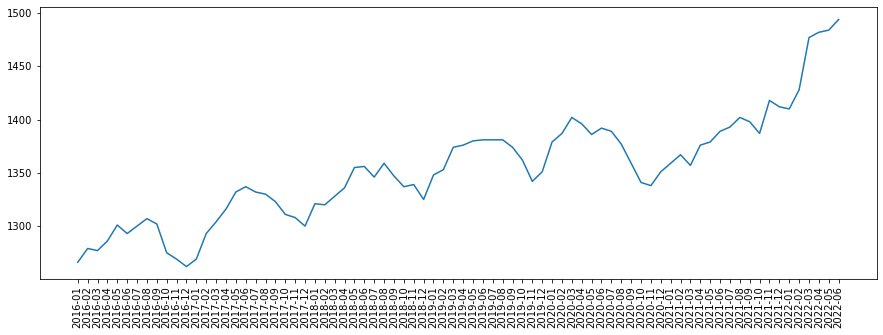

In [33]:
# x=time
x=np.arange(len(time))
y=rent25
plt.figure(figsize=(15,5))
plt.plot(x,y,)
plt.xticks(rotation=90,labels=time, ticks=x)
plt.show()


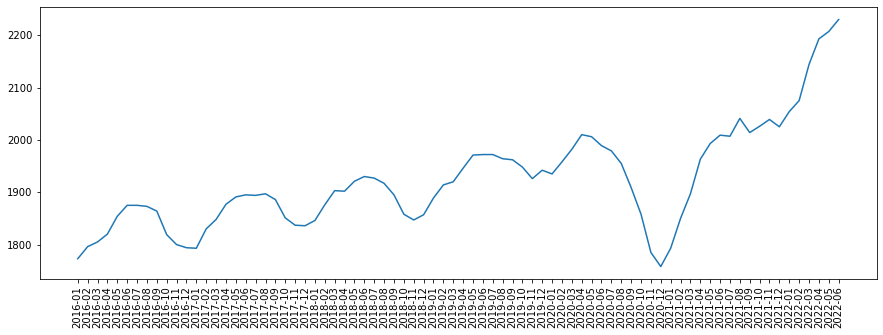

In [34]:
# x=time
x=np.arange(len(time))
y=rent14
plt.figure(figsize=(15,5))
plt.plot(x,y,)
plt.xticks(rotation=90,labels=time, ticks=x)
plt.show()


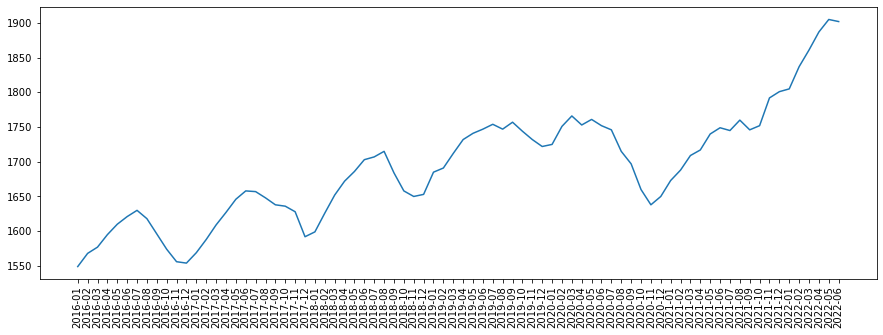

In [35]:
# x=time
x=np.arange(len(time))
y=rent47
plt.figure(figsize=(15,5))
plt.plot(x,y,)
plt.xticks(rotation=90,labels=time, ticks=x)
plt.show()


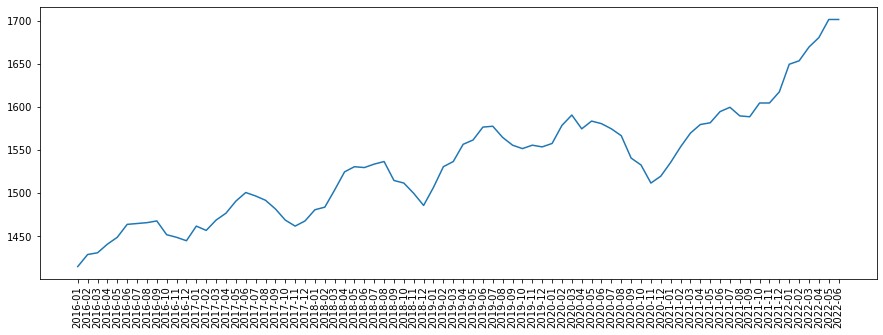

In [36]:
# x=time
x=np.arange(len(time))
y=rent18
plt.figure(figsize=(15,5))
plt.plot(x,y,)
plt.xticks(rotation=90,labels=time, ticks=x)
plt.show()


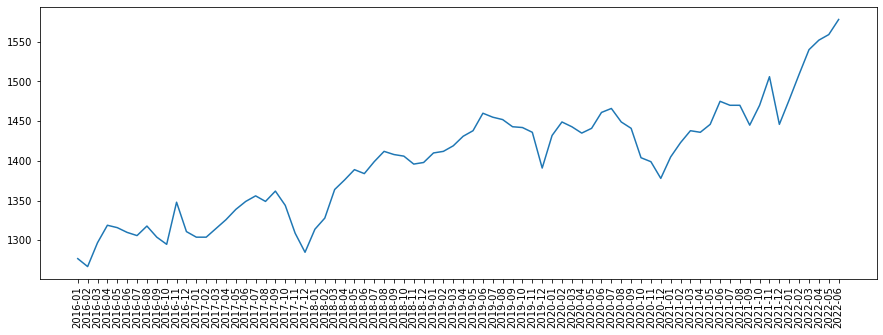

In [37]:
# x=time
x=np.arange(len(time))
y=rent08
plt.figure(figsize=(15,5))
plt.plot(x,y,)
plt.xticks(rotation=90,labels=time, ticks=x)
plt.show()


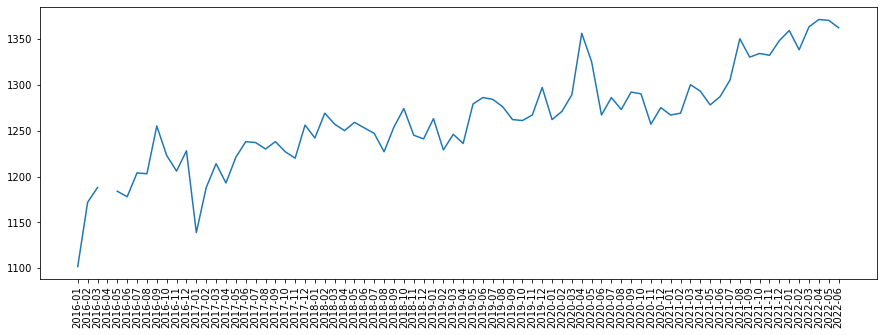

In [38]:
# x=time
x=np.arange(len(time))
y=rent24
plt.figure(figsize=(15,5))
plt.plot(x,y,)
plt.xticks(rotation=90,labels=time, ticks=x)
plt.show()


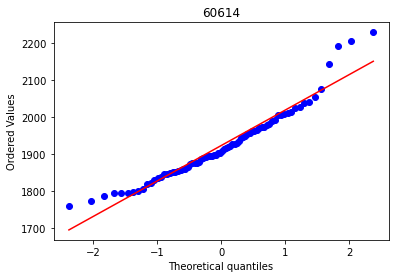

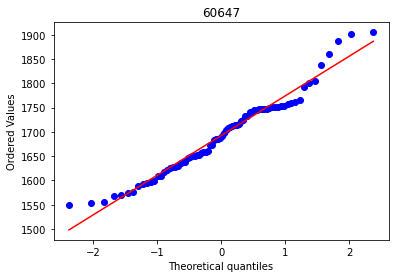

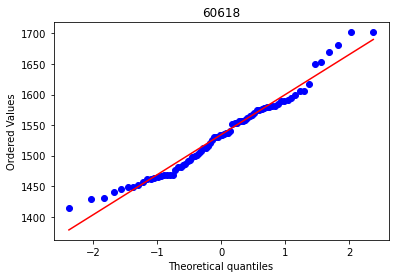

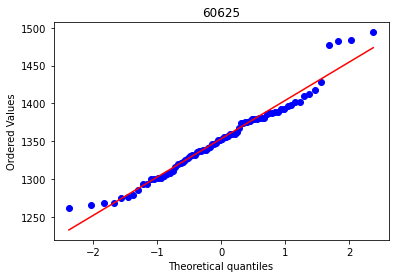

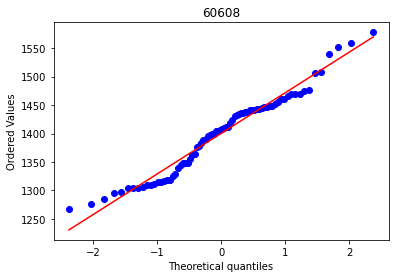

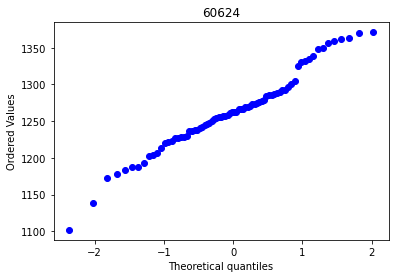

In [39]:
for col in chiflip.columns:
    stats.probplot(chiflip[col],dist="norm",plot=plt)
    plt.title(col)
    plt.show()
# qq plot - the closer to the line the more normalized
# run this all zip codes

In [40]:
# Melt allows us to make our columns into column values (See the zip_code column)
anova_ready = pd.melt(chiflip.copy().reset_index(), id_vars=['index'], value_vars=chiflip.columns)
anova_ready.columns = ['date', 'zip_code', 'rent']
# One of our rent values is null, so we need to drop it to prevent later errors
anova_ready.dropna(how="any", inplace=True)
print(anova_ready.info())
anova_ready

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 467
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      467 non-null    datetime64[ns]
 1   zip_code  467 non-null    object        
 2   rent      467 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.6+ KB
None


,date,zip_code,rent
0,2016-01-01,60614,1773.0
1,2016-02-01,60614,1796.0
2,2016-03-01,60614,1805.0
3,2016-04-01,60614,1820.0
4,2016-05-01,60614,1854.0
...,...,...,...
463,2022-02-01,60624,1338.0
464,2022-03-01,60624,1363.0
465,2022-04-01,60624,1371.0
466,2022-05-01,60624,1370.0


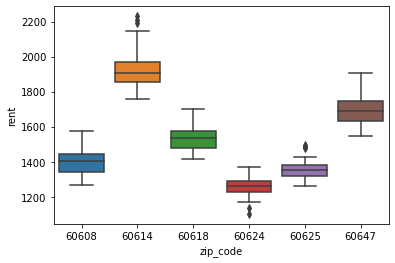

In [41]:
import seaborn as sns

# Basically just checking the distribution again. There's a scew for some of these
# which is important to know
ax = sns.boxplot(x='zip_code', y='rent', data=anova_ready)
plt.show()

In [42]:
# checking our f and p values
clean_chiflip = chiflip.dropna(how="any") #Once again, removing that single nan
f_val, p_val = stats.f_oneway(clean_chiflip[60608], clean_chiflip[60614], clean_chiflip[60618], clean_chiflip[60624], 
                              clean_chiflip[60625], clean_chiflip[60647])

# p is less than .05, so it's significant (we can use the f value)
print(f"F VALUE: {f_val}     P VALUE: {p_val} ")

F VALUE: 902.2453404766235     P VALUE: 7.662703860872899e-234 


In [43]:
# p value is lower than .05 so we can use this
# there's a difference between the zip codes, but we can't tell which specific one

# The reason we're not looking at date is that in time series date is basically a sequence where
# the value doesn't really matter (other than the fact that x is before y); basically it's an index.
rent_lm = ols('rent ~ C(zip_code)', data=anova_ready).fit()
table = sm.stats.anova_lm(rent_lm, typ=2)
table

,sum_sq,df,F,PR(>F)
C(zip_code),2.332547e+07,5.0,902.860381,1.686628e-235
Residual,2.381994e+06,461.0,NaN,NaN
